In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
#inspector
inspector = inspect(engine)
table_names = inspector.get_table_names()
Base = automap_base()
Base.prepare(autoload_with = engine)
Base.classes.keys()


['station', 'measurement']

In [24]:
# reflect an existing database into a new model
measurement = Base.classes.measurement
station = Base.classes.station
# reflect the tables
station

sqlalchemy.ext.automap.station

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [26]:
# Save references to each table
columns = inspector.get_columns('measurement')
for col in columns:
    print (col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(desc(measurement.date)).first()

('2017-08-23',)

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
date = session.query(measurement.date).order_by(desc(measurement.date)).first()
dt.datetime.strptime(date[0], '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
past_year = dt.datetime.strptime(date[0], '%Y-%m-%d') - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
past_year_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= past_year).all()
past_year_data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(past_year_data, columns = ['year', 'precipitation'])
prcp_df
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
# plt.scatter(prcp_df['year'], prcp_df['precipitation'])

,year,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [30]:
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [32]:
columns = inspector.get_columns('station')
for col in columns:
    print (col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [33]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [34]:
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.



In [36]:
most_active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).first()
most_active_station[0]
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station[0]).all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [38]:
most_active_station_id = most_active_station[0]
most_active_station_latest_date = session.query(measurement.date).order_by(desc(measurement.date)).first()
most_active_station_latest_date = dt.datetime.strptime(most_active_station_latest_date[0], '%Y-%m-%d')
most_active_station_past_year = most_active_station_latest_date - dt.timedelta(365)
most_active_station_past_year_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= past_year).all()
prcp_df = pd.DataFrame(most_active_station_past_year_data, columns = ['date', 'temp'])
prcp_df


,date,temp
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0
3,2016-08-27,77.0
4,2016-08-28,78.0
...,...,...
2218,2017-08-19,71.0
2219,2017-08-20,78.0
2220,2017-08-21,76.0
2221,2017-08-22,76.0


(array([ 10.,  17.,  66.,  85., 258., 246., 290., 591., 356., 283.,  18.,
          3.]),
 array([58.        , 60.41666667, 62.83333333, 65.25      , 67.66666667,
        70.08333333, 72.5       , 74.91666667, 77.33333333, 79.75      ,
        82.16666667, 84.58333333, 87.        ]),
 <BarContainer object of 12 artists>)

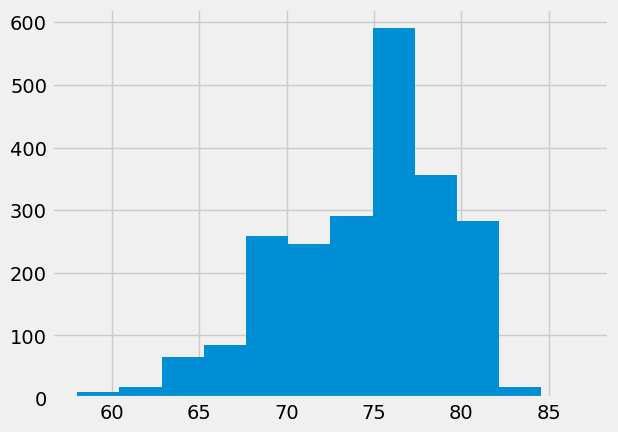

In [39]:
plt.hist(prcp_df['temp'], bins = 12, label='tobs')

Text(0.5, 4.183333333333314, 'Temperature')

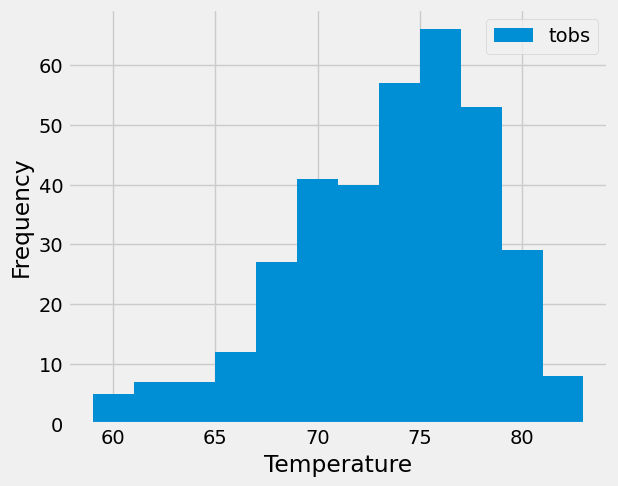

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [134]:
# Close Session
session.close()